In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "suggestion_2/forecasted_counts/block_0201"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
6370/910

7.0

In [6]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [7]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [8]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [9]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [10]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [11]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [12]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [13]:
# ordered_csv_files

In [14]:
# averaged_forecasts_csvs list is pointless at this time?

In [15]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 450 ms, sys: 25.4 ms, total: 475 ms
Wall time: 477 ms


In [16]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [17]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.0,-0.005777,0.0,-0.008793,0.0,-0.006146,0.0,0.004816,0.0,-0.014672,...,0.000000e+00,-0.002431,0.0,-0.001711,0.0,-0.002284,0.0,-0.005224,0.0,0.005208
1,0.0,0.001021,0.0,0.003633,0.0,-0.003488,0.0,0.003368,0.0,-0.005259,...,2.317985e-04,-0.004177,0.0,0.002753,0.0,-0.004188,0.0,-0.000814,0.0,0.004201
2,0.0,-0.001544,0.0,-0.000695,0.0,-0.008081,0.0,0.000438,0.0,-0.004590,...,1.185987e-09,-0.007599,0.0,-0.002196,0.0,-0.002343,0.0,-0.003754,0.0,0.001391
3,0.0,0.003831,0.0,0.006051,0.0,-0.002398,0.0,-0.003274,0.0,-0.003589,...,0.000000e+00,-0.007457,0.0,0.004806,0.0,-0.000121,0.0,0.001489,0.0,0.001759
4,0.0,0.001369,0.0,-0.003473,0.0,-0.004376,0.0,-0.000324,0.0,-0.002456,...,0.000000e+00,-0.002928,0.0,-0.000295,0.0,0.005174,0.0,-0.000559,0.0,0.001616


In [18]:
combined_df.shape

(7, 1820)

In [19]:
# get the true values
True_values_df = combined_df[['True_value']]

In [20]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.0,0.0,0.0,7.834402e-07,0.000004,0.0,0.0,...,0.0,0.0,0.000002,0.387255,0.026875,0.000000e+00,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000865,0.294906,2.317985e-04,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000054,0.000619,1.185987e-09,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000567,0.000107,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0


In [21]:
True_values_df.shape

(7, 910)

In [22]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [23]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.0,0.0,0.0,7.834405e-07,0.000004,0.0,0.0,...,0.0,0.0,2.478146e-06,0.472933,0.027239,0.000000e+00,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000866,0.343000,2.318253e-04,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000054,0.000620,1.185987e-09,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,5.671876e-04,0.000107,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,2.057258e-07,0.001316,0.000011,0.000000e+00,0.0,0.0,0.0,0.0


In [24]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [25]:
sum_true_values

0    45.000217
1    45.000040
2    47.000001
3    37.999999
4    42.000041
5    35.000000
6    29.000000
dtype: float64

In [26]:
# get the forecasted values
Forecasted_values_df = combined_df[['Forecasted_value']]

In [27]:
Forecasted_values_df.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,-0.005777,-0.008793,-0.006146,0.004816,-0.014672,0.000748,-0.009469,-0.007004,-0.027035,0.039585,...,0.008673,-0.002227,-0.026121,0.024252,0.026794,-0.002431,-0.001711,-0.002284,-0.005224,0.005208
1,0.001021,0.003633,-0.003488,0.003368,-0.005259,-0.000532,-0.003823,-0.006308,-0.016170,0.033266,...,-0.000024,-0.005004,-0.002140,0.023740,0.003958,-0.004177,0.002753,-0.004188,-0.000814,0.004201
2,-0.001544,-0.000695,-0.008081,0.000438,-0.004590,-0.002605,-0.007003,-0.004563,-0.007796,0.036625,...,-0.004210,-0.001544,0.008659,0.012724,0.013672,-0.007599,-0.002196,-0.002343,-0.003754,0.001391
3,0.003831,0.006051,-0.002398,-0.003274,-0.003589,0.001504,-0.005258,-0.001873,0.002374,0.034539,...,-0.001725,-0.001441,0.004502,0.024218,0.005065,-0.007457,0.004806,-0.000121,0.001489,0.001759
4,0.001369,-0.003473,-0.004376,-0.000324,-0.002456,-0.002084,0.002928,-0.002089,-0.000305,0.024476,...,0.000920,0.003627,0.010481,0.023036,0.015444,-0.002928,-0.000295,0.005174,-0.000559,0.001616


In [28]:
exp_forecasted = np.exp(Forecasted_values_df)-1

In [29]:
exp_forecasted

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,-0.005760,-0.008755,-0.006127,0.004827,-0.014565,0.000748,-0.009424,-0.006980,-0.026673,0.040379,...,0.008710,-0.002225,-0.025783,0.024548,0.027156,-0.002428,-0.001709,-0.002282,-0.005210,0.005222
1,0.001021,0.003640,-0.003482,0.003374,-0.005245,-0.000532,-0.003815,-0.006288,-0.016040,0.033825,...,-0.000024,-0.004992,-0.002138,0.024024,0.003966,-0.004168,0.002757,-0.004179,-0.000814,0.004210
2,-0.001542,-0.000695,-0.008048,0.000438,-0.004579,-0.002602,-0.006978,-0.004552,-0.007765,0.037304,...,-0.004201,-0.001543,0.008697,0.012805,0.013766,-0.007570,-0.002193,-0.002340,-0.003747,0.001392
3,0.003838,0.006069,-0.002395,-0.003268,-0.003582,0.001505,-0.005244,-0.001871,0.002377,0.035143,...,-0.001723,-0.001440,0.004512,0.024513,0.005078,-0.007430,0.004818,-0.000121,0.001490,0.001761
4,0.001370,-0.003467,-0.004366,-0.000324,-0.002453,-0.002082,0.002932,-0.002087,-0.000305,0.024778,...,0.000920,0.003634,0.010536,0.023303,0.015564,-0.002924,-0.000295,0.005187,-0.000559,0.001617
5,0.002364,-0.000322,-0.001335,0.000408,-0.000238,-0.000925,0.002789,0.000209,0.008850,0.028356,...,0.009831,0.001298,0.002877,0.015533,0.012557,0.002736,0.006667,0.003184,-0.000493,0.001709
6,0.001453,-0.005336,-0.002197,-0.003882,0.000296,0.004595,0.006170,-0.001084,0.005981,0.019175,...,0.003326,-0.000799,0.008327,0.007792,0.014401,-0.001635,0.000539,0.005729,-0.000836,0.000697


In [30]:
# set the values to 0 if the forecasted count is negative?

In [31]:
exp_forecasted[exp_forecasted < 0] = 0

In [32]:
exp_forecasted.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,0.000000,0.000000,0.0,0.004827,0.0,0.000748,0.000000,0.0,0.000000,0.040379,...,0.00871,0.000000,0.000000,0.024548,0.027156,0.0,0.000000,0.000000,0.00000,0.005222
1,0.001021,0.003640,0.0,0.003374,0.0,0.000000,0.000000,0.0,0.000000,0.033825,...,0.00000,0.000000,0.000000,0.024024,0.003966,0.0,0.002757,0.000000,0.00000,0.004210
2,0.000000,0.000000,0.0,0.000438,0.0,0.000000,0.000000,0.0,0.000000,0.037304,...,0.00000,0.000000,0.008697,0.012805,0.013766,0.0,0.000000,0.000000,0.00000,0.001392
3,0.003838,0.006069,0.0,0.000000,0.0,0.001505,0.000000,0.0,0.002377,0.035143,...,0.00000,0.000000,0.004512,0.024513,0.005078,0.0,0.004818,0.000000,0.00149,0.001761
4,0.001370,0.000000,0.0,0.000000,0.0,0.000000,0.002932,0.0,0.000000,0.024778,...,0.00092,0.003634,0.010536,0.023303,0.015564,0.0,0.000000,0.005187,0.00000,0.001617


In [33]:
sum_forecasted_values = exp_forecasted.sum(axis = 1)

In [34]:
sum_forecasted_values

0    26.795742
1    28.917707
2    32.399346
3    26.510882
4    22.492894
5    27.585801
6    25.248212
dtype: float64

In [35]:
# concatenate the sum dataframes
block_0103_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [36]:
block_0103_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [37]:
block_0103_true_and_forecasted_values_df

,True_count,Forecasted_count
0,45.000217,26.795742
1,45.000040,28.917707
2,47.000001,32.399346
3,37.999999,26.510882
4,42.000041,22.492894
5,35.000000,27.585801
6,29.000000,25.248212


In [38]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

14.065145997607761

In [39]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

13.007102028417052

In [40]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=0.4553895753683057, pvalue=0.3045093354444368)

In [41]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-4.476545688624541

##### Coverages and widths for the forecasted values?

In [42]:
# Should we get the interval preds in the same thinking way too?

In [43]:
# maybe we should - so first convert to data scale before avearging, and see if the measures differ a lot

In [44]:
# for this we need the all_forecasts npy files

In [45]:
# content location is the same path as above

In [46]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [47]:
# all_forecasts_npy_files

In [48]:
# load the npy files

In [49]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.exp(np.mean(load_file, axis = 1)) - 1
    loaded_npy_files.append(mean_file)

CPU times: user 262 ms, sys: 74.5 ms, total: 337 ms
Wall time: 338 ms


In [50]:
len(loaded_npy_files)

910

In [51]:
loaded_npy_files[0].shape

(1000, 7)

In [52]:
loaded_npy_files[0]

array([[-1.48826838e-03,  6.77466393e-03, -1.53064728e-04, ...,
         2.13027000e-03,  4.36413288e-03,  1.99723244e-03],
       [-1.47795677e-03,  7.29763508e-03, -7.20620155e-05, ...,
         2.82752514e-03,  3.59630585e-03,  3.23522091e-03],
       [-3.28898430e-04,  7.18247890e-03,  4.41312790e-04, ...,
         2.73549557e-03,  4.34124470e-03,  3.05283070e-03],
       ...,
       [-3.00472975e-03, -9.10282135e-04,  1.19578838e-03, ...,
         1.14154816e-03,  2.86734104e-03,  1.38473511e-03],
       [-4.05603647e-03, -6.66916370e-04,  1.04784966e-04, ...,
         1.91915035e-03,  2.69937515e-03,  1.09505653e-03],
       [-2.15131044e-03, -1.76072121e-04, -1.72138214e-04, ...,
         3.01229954e-03,  2.97093391e-03,  1.07336044e-03]], dtype=float32)

In [53]:
%%time
# convert less than 0 entries to 0 for all arrays
for arr in loaded_npy_files:
    arr[arr < 0] = 0

CPU times: user 20.8 ms, sys: 921 µs, total: 21.8 ms
Wall time: 21 ms


In [54]:
loaded_npy_files[0]

array([[0.        , 0.00677466, 0.        , ..., 0.00213027, 0.00436413,
        0.00199723],
       [0.        , 0.00729764, 0.        , ..., 0.00282753, 0.00359631,
        0.00323522],
       [0.        , 0.00718248, 0.00044131, ..., 0.0027355 , 0.00434124,
        0.00305283],
       ...,
       [0.        , 0.        , 0.00119579, ..., 0.00114155, 0.00286734,
        0.00138474],
       [0.        , 0.        , 0.00010478, ..., 0.00191915, 0.00269938,
        0.00109506],
       [0.        , 0.        , 0.        , ..., 0.0030123 , 0.00297093,
        0.00107336]], dtype=float32)

In [55]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [56]:
output.shape

(1000, 7)

In [57]:
output

array([[37.50211 , 37.614037, 42.83846 , ..., 34.2522  , 39.365135,
        34.137955],
       [33.67325 , 34.477875, 37.788948, ..., 30.666382, 38.568363,
        40.86204 ],
       [37.925667, 40.891014, 41.77998 , ..., 36.21237 , 46.06561 ,
        42.478775],
       ...,
       [31.4337  , 34.947765, 39.791534, ..., 34.19396 , 39.41924 ,
        44.96911 ],
       [31.180832, 33.303596, 43.094395, ..., 39.315292, 38.94195 ,
        39.34959 ],
       [29.985376, 35.93759 , 37.800037, ..., 29.97045 , 36.24132 ,
        35.39157 ]], dtype=float32)

In [58]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [59]:
output_alt.shape

(1000, 7)

In [60]:
output_alt

array([[37.50211 , 37.614037, 42.83846 , ..., 34.2522  , 39.365135,
        34.137955],
       [33.67325 , 34.477875, 37.788948, ..., 30.666382, 38.568363,
        40.86204 ],
       [37.925667, 40.891014, 41.77998 , ..., 36.21237 , 46.06561 ,
        42.478775],
       ...,
       [31.4337  , 34.947765, 39.791534, ..., 34.19396 , 39.41924 ,
        44.96911 ],
       [31.180832, 33.303596, 43.094395, ..., 39.315292, 38.94195 ,
        39.34959 ],
       [29.985376, 35.93759 , 37.800037, ..., 29.97045 , 36.24132 ,
        35.39157 ]], dtype=float32)

In [61]:
np.mean(output_alt == output)

1.0

In [62]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [63]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [64]:
li_train

array([[24.80686741],
       [25.35188231],
       [26.72654157],
       [23.80777059],
       [20.75789733],
       [23.91302953],
       [23.16749382]])

In [65]:
ui_train

array([[41.51867123],
       [43.97774925],
       [48.7353137 ],
       [44.93095055],
       [39.87523537],
       [46.06579943],
       [44.16026154]])

In [66]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [67]:
avg_width_train

20.10464264324733

In [68]:
y_traina = block_0103_true_and_forecasted_values_df[["True_count"]].values

In [69]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [70]:
coverage_train

0.5714285714285714

In [71]:
np.mean(output, axis = 0)

array([32.830585, 34.339993, 37.383022, 33.922714, 29.873075, 34.318356,
       33.2258  ], dtype=float32)

In [72]:
# sum_forecasted_values

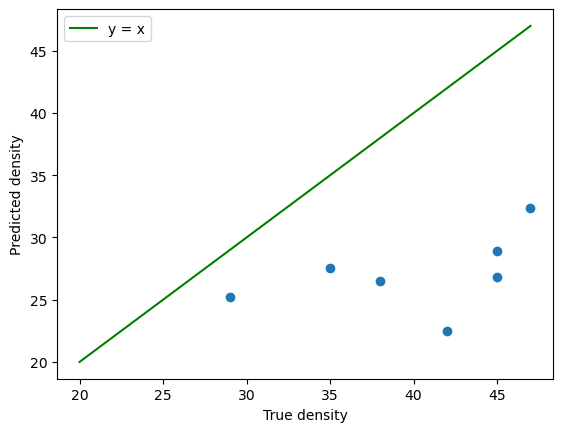

In [73]:
plt.scatter(block_0103_true_and_forecasted_values_df['True_count'], block_0103_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([20, 47], [20, 47], color='green', label='y = x')
plt.legend()
plt.show()

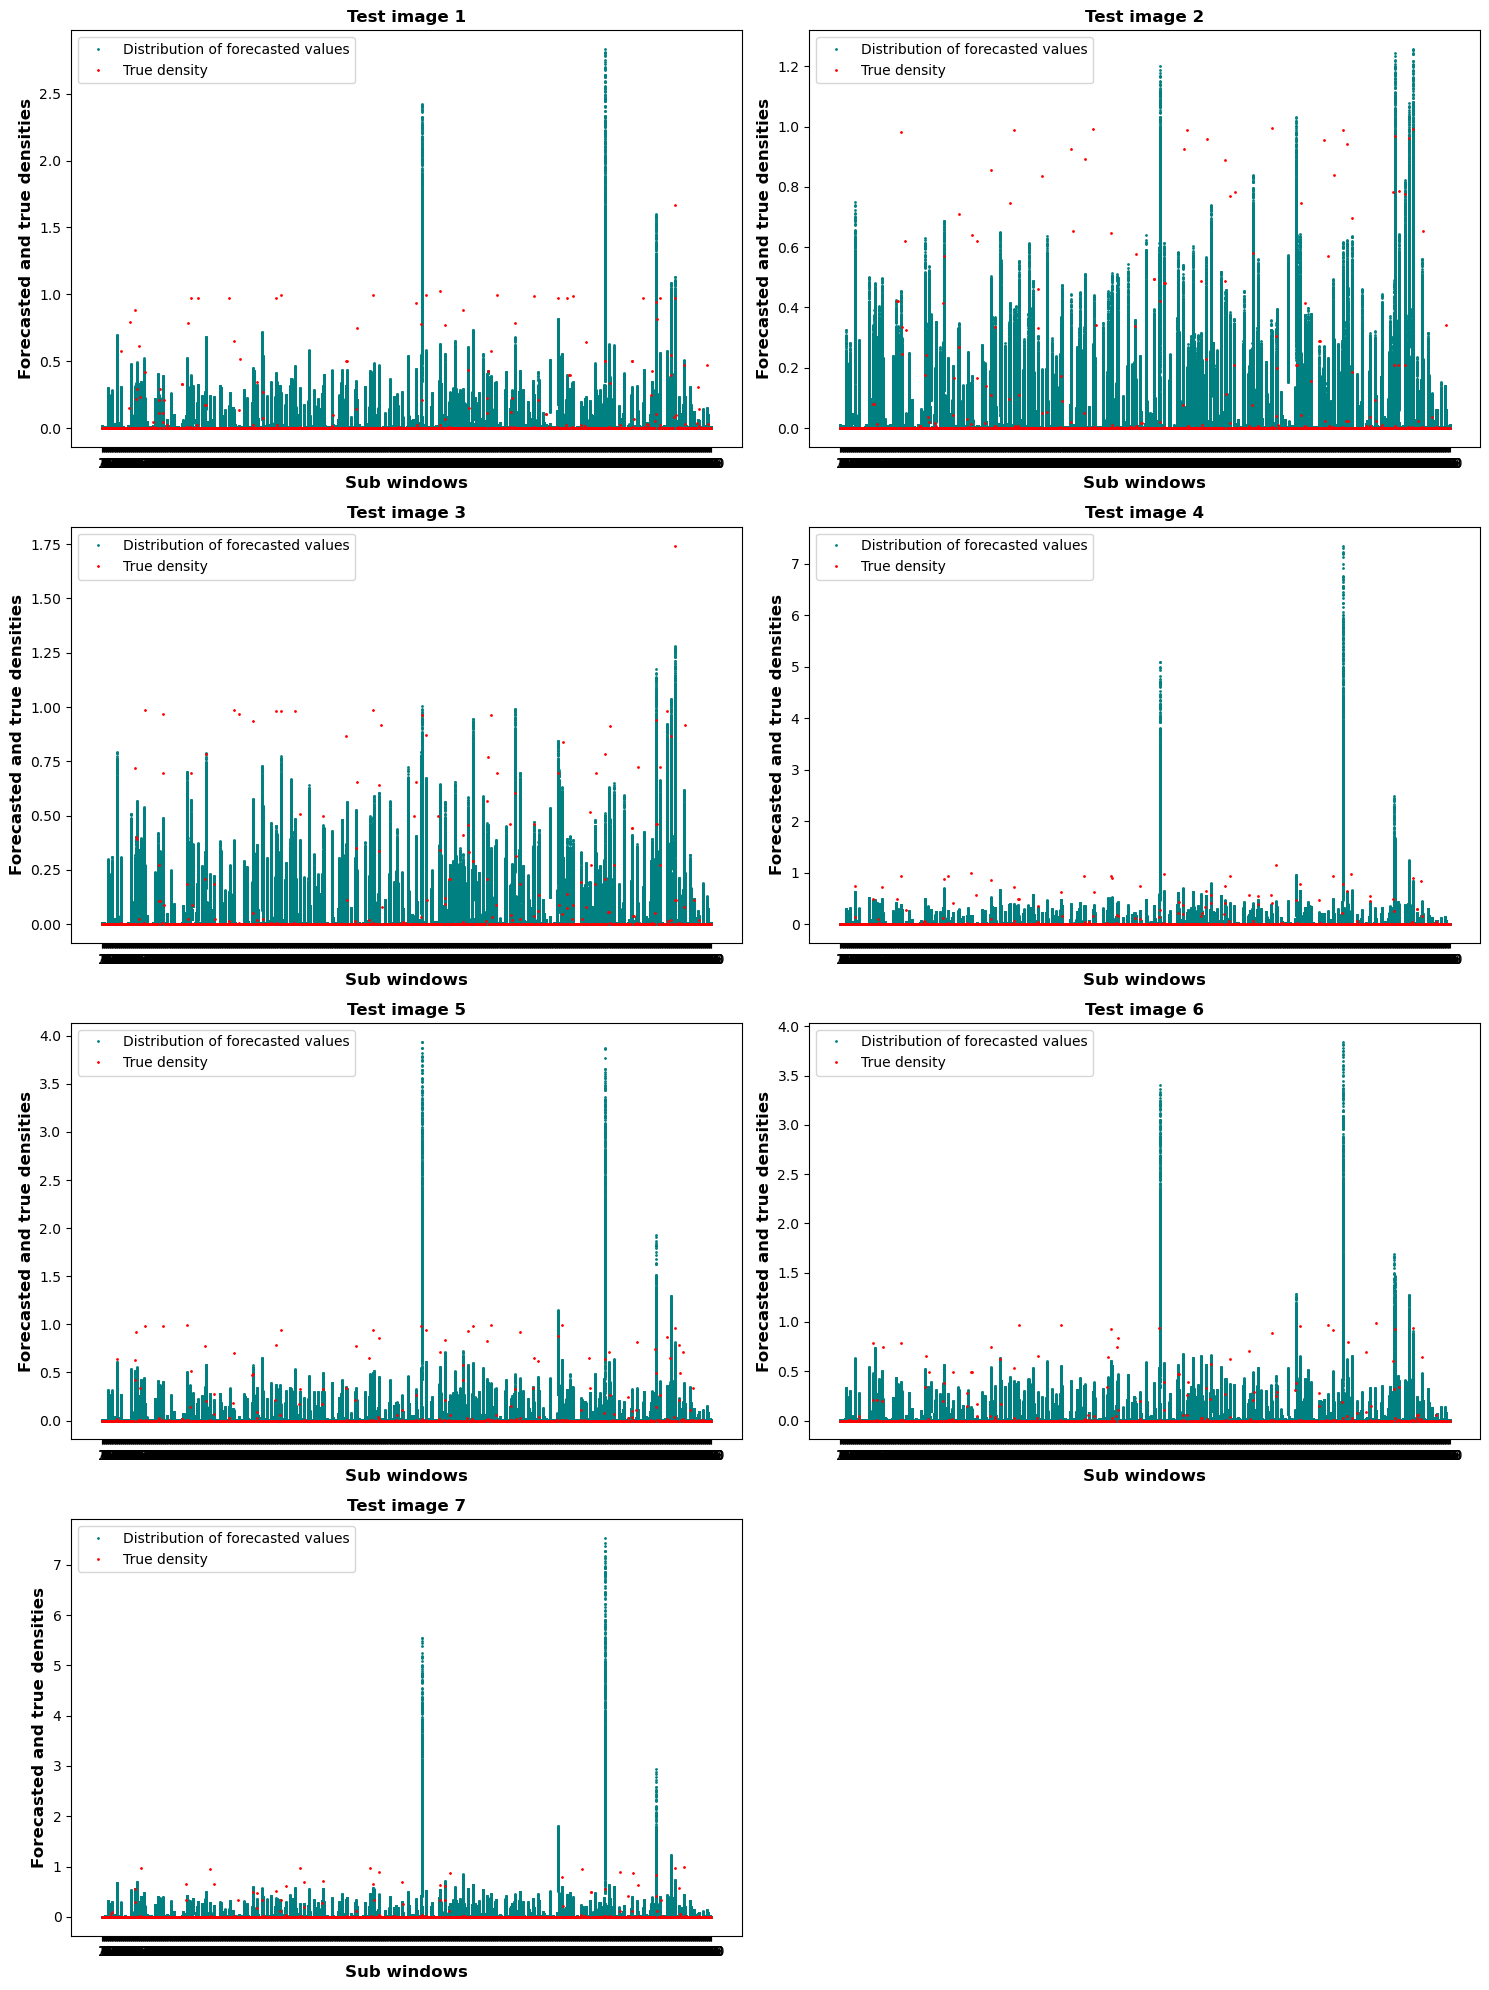

CPU times: user 27.5 s, sys: 725 ms, total: 28.2 s
Wall time: 27.9 s


In [74]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [75]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots